In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
match_data=pd.read_csv("IPL Matches 2008-2020.csv")
ball_data=pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
match_data.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
ball_data.isnull().sum()


id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [7]:
ball_data.shape


(193468, 18)

In [8]:
match_data.shape

(816, 17)

In [9]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [10]:
ball_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [11]:
print("the matches played:",match_data.shape[0])#no of rows in the match_data
print("\n the matches played in the different cities are:",match_data["city"].unique())
print("\n the teams which are played is:",match_data["team1"].unique())

the matches played: 816

 the matches played in the different cities are: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 the teams which are played is: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [12]:
match_data["season"]=pd.DatetimeIndex(match_data["date"]).year #adding new column 
#called season by extracting the year from the dates.
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [13]:
match_per_season=match_data.groupby(["season"])["id"].count().reset_index().rename(columns={"id":"matches"})
match_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


Text(0.5, 1.0, 'matches palyed in each season:')

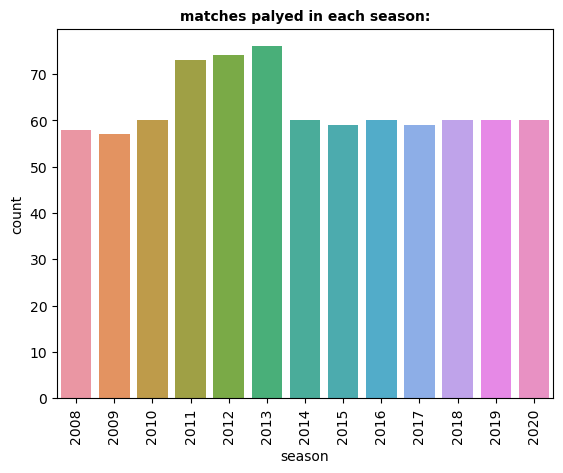

In [14]:
sns.countplot(x="season",data=match_data)#bar graph

plt.xticks(rotation=45+45,fontsize=10)#x-ticks:-to edit the x-labels
plt.yticks(fontsize=10)#y-ticks:-to edit the y-labels
#rotation=45 means "used to rotate the labels(years: from 2008-20) in 90 degree.

plt.xlabel("season",fontsize=10)
plt.ylabel("count",fontsize=10)
plt.title("matches palyed in each season:",fontsize=10,fontweight="bold")


In [15]:
season_data=match_data[["id","season"]].merge(ball_data,left_on="id",right_on="id",how="left").drop("id",axis=1)
season_data
#match_data[["id", "season"]] → Selects only the "id" and "season" columns from the match_data DataFrame.
#.merge(ball_data, → Merges the match_data (containing "id" and "season") with ball_data on matching columns.
#left_on="id", right_on="id", → Specifies that the merge should happen on the "id" column from both DataFrames (match_data and ball_data).
#how="left" → Performs a left join. It keeps all rows from match_data and only matching rows from ball_data.
#.drop("id", axis=1) → Drops the "id" column from the merged DataFrame (since it’s no longer needed). axis=1 indicates column-wise operation.


,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


/tmp/ipykernel_672/633587521.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=season.index, y=season.values, palette="magma")


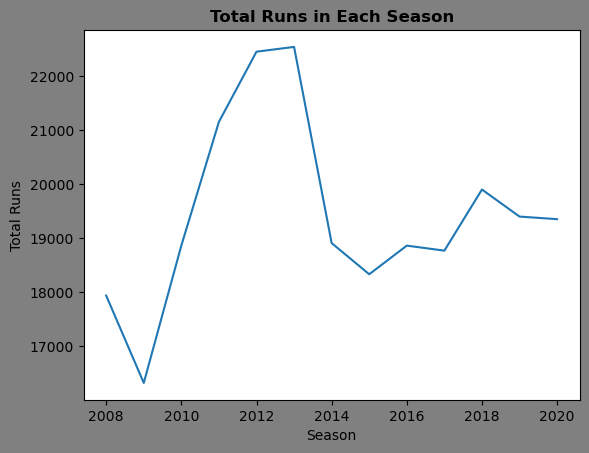

In [16]:
# Group total runs by season  
season = season_data.groupby("season")["total_runs"].sum()  

# Plot  
plt.figure(facecolor="grey")  
sns.lineplot(x=season.index, y=season.values, palette="magma")  
plt.title("Total Runs in Each Season", fontsize=12, fontweight="bold")  
plt.xlabel("Season")  
plt.ylabel("Total Runs")  
plt.show()


In [17]:
#Ensure `season` is a DataFrame with a proper column name
season = season_data.groupby("season", as_index=False)["total_runs"].sum()  

#Merge match count and total runs per season  
#how="left" → Keeps all rows from match_per_season, adding matching "total_runs" 
#from season.
#on="season" → Matches rows where the "season" values are the same.
runs_per_season = pd.merge(match_per_season, season, on="season", how="left")  

#Calculate runs per match safely  
runs_per_season["runs scored per match"] = runs_per_season["total_runs"] / runs_per_season["matches"]  

#Set "season" as the index  
runs_per_season.set_index("season", inplace=True)  

#Display the DataFrame  
print(runs_per_season)


        matches  total_runs  runs scored per match
season                                            
2008         58       17937             309.258621
2009         57       16320             286.315789
2010         60       18864             314.400000
2011         73       21154             289.780822
2012         74       22453             303.418919
2013         76       22541             296.592105
2014         60       18909             315.150000
2015         59       18332             310.711864
2016         60       18862             314.366667
2017         59       18769             318.118644
2018         60       19901             331.683333
2019         60       19400             323.333333
2020         60       19352             322.533333


In [18]:
toss = match_data["toss_winner"].value_counts()
print(toss)

toss_winner
Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64


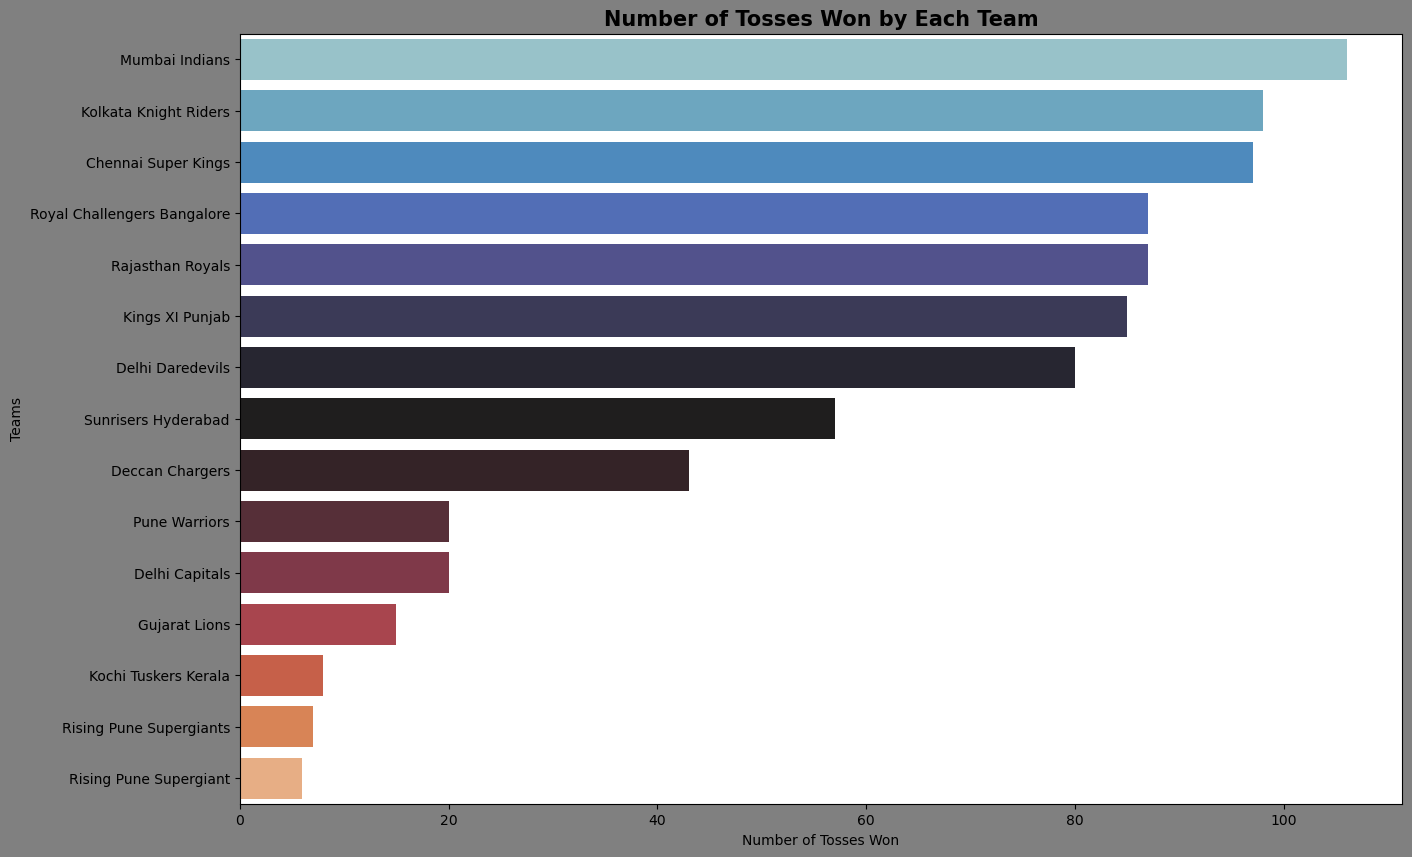

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count how many times each team has won the toss
toss = match_data["toss_winner"].value_counts()

# Set plot background color
plt.figure(figsize=(15, 10), facecolor="grey")

# Create a horizontal bar plot
sns.barplot(y=toss.index, x=toss.values, palette="icefire")
#toss.index refers to the team names (which are stored as the index in the toss Series)
#toss.values refers to the values in the toss Series, which are the number of toss won by each team.


# Set title and labels
plt.title("Number of Tosses Won by Each Team", fontsize=15, fontweight="bold")
plt.xlabel("Number of Tosses Won")
plt.ylabel("Teams")

# Show the plot
plt.show()


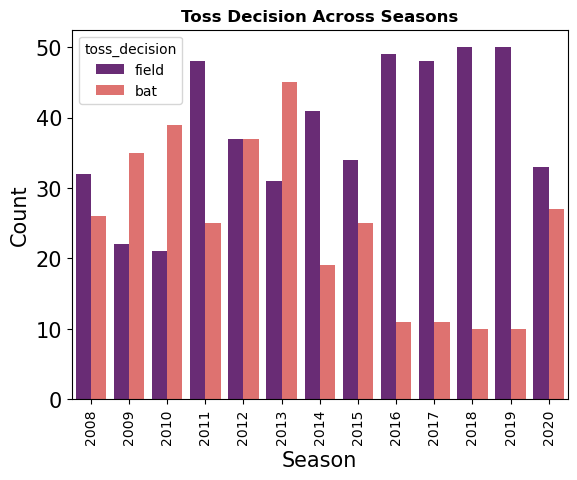

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot of toss decisions across seasons
sns.countplot(x="season", hue="toss_decision", data=match_data, palette="magma")

# Rotate x-axis labels and adjust font sizes
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)

# Set labels and title
plt.xlabel("Season", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Toss Decision Across Seasons", fontsize=12, fontweight="bold")

# Show the plot
plt.show()


In [21]:
match_data["result"].value_counts()


result
wickets    435
runs       364
tie         13
Name: count, dtype: int64

In [22]:
match_data.venue[match_data.result!="runs"].mode()
# it picks venue data for matches that did not end with a result based on runs.
#mode() is a Pandas function that returns the most frequent value (or values) in a column or Series.
#In this case, it will give the most common venue (or venues) where matches that didn’t have a result based on "runs" were played.

0    Eden Gardens
Name: venue, dtype: object

In [23]:
match_data.venue[match_data.result!="wickets"].mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

In [24]:
match_data.venue[match_data.toss_winner=="Kings XI Punjab"][match_data.winner=="Kings XI Punjab"].mode()
#This expression combines the two filters:
#*First filter: selects the rows where the toss winner is "Kings XI Punjab".
#*Second filter: from the result of the first filter, it further selects the rows where the match winner is also "Kings XI Punjab".
#*Result: This gives the venues where "Kings XI Punjab" won both the toss and the match.

0    Punjab Cricket Association Stadium, Mohali
Name: venue, dtype: object

In [25]:
match_data.venue[match_data.toss_winner=="Royal Challengers Bangalore"][match_data.winner=="Royal Challengers Bangalore"].mode()


0    M Chinnaswamy Stadium
Name: venue, dtype: object

In [26]:
match_data.winner[match_data.result!="runs"].mode()
#This applies the filter to the winner column.
#It selects the winner column but only for the rows where the result is not "runs".
#This essentially filters out matches that were decided by runs, leaving only those that had other results (e.g., wickets, ties, etc.).

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: object

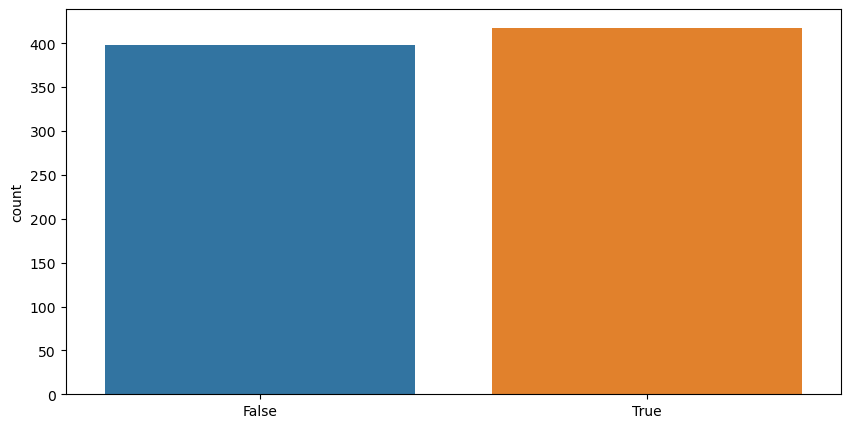

In [27]:
# Create a boolean Series where True means toss winner equals match winner
toss = match_data["toss_winner"] == match_data["winner"]

# Create a count plot to visualize the distribution of True and False
plt.figure(figsize=(10, 5))
sns.countplot(x=toss)
plt.show()


#toss = match_data["toss_winner"] == match_data["winner"]:
#*This creates a boolean Series (True or False) that checks if the toss winner is 
#the same as the match winner for each match.


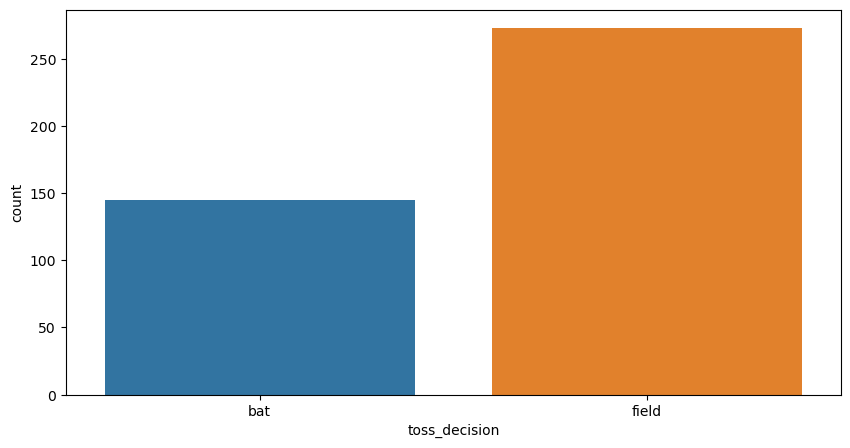

In [28]:
# Filter the data where toss winner is the same as the match winner
filtered_data = match_data[match_data.toss_winner == match_data.winner]

# Create a count plot for toss decision where toss winner equals match winner
plt.figure(figsize=(10, 5))
sns.countplot(x=filtered_data["toss_decision"])

# Display the plot
plt.show()


In [29]:
player=(ball_data["batsman"]=="SK Raina")
df_raina=ball_data[player]
df_raina
#It will return a Boolean Series:
#*True for rows where the batsman is SK Raina.
#*False for rows where the batsman is not SK Raina.
#ball_data[player]:-uses the previous Boolean Series to filter the ball_data DataFrame.
#It keeps only the rows where the value of player is True, i.e., the rows where SK Raina is the batsman.

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178795,1181768,2,7,5,SK Raina,SR Watson,RD Chahar,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
178796,1181768,2,7,6,SK Raina,SR Watson,RD Chahar,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
178797,1181768,2,8,1,SK Raina,SR Watson,MJ McClenaghan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians
178886,1181768,2,9,1,SK Raina,SR Watson,RD Chahar,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians


AttributeError: Text.set() got an unexpected keyword argument 'fontsise'

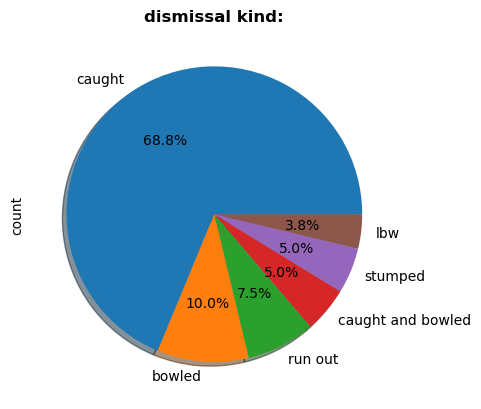

In [30]:
df_raina["dismissal_kind"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,rotatelabels=False)
plt.title("dismissal kind:",fontweight="bold",fontsise=15)
plt.show()

#value_counts() is a method used on a pandas Series (a column of a DataFrame). It counts the occurrences of each unique value in the "dismissal_kind" column and returns a Series of counts.
#For example, it might return something like:
#"caught" 4 times
#"bowled" 2 times
#"run out" 1 time
#-----------------------------------
#.plot.pie(autopct="%1.1f%%", shadow=True, rotatelabels=True)
#.plot.pie(): This creates a pie chart to visualize the counts of each dismissal kind.
#*autopct="%1.1f%%": This formats the percentage displayed on the pie chart to show 1 decimal place. For example, a portion of the pie representing 33.4% will be displayed as "33.4%".
#*shadow=True: This adds a shadow effect behind the pie chart to give it a 3D look.
#*rotatelabels=True: This rotates the labels on the pie chart to make them easier to read, especially if there are many categories.3

In [42]:
def count(df_raina,runs):
    return len(df_raina[df_raina['batsman_runs']==runs])*runs
print("runs from 1's:",count(df_raina,1))
print("runs from 2's:",count(df_raina,2))
print("runs from 3's:",count(df_raina,3))
print("runs from 4's:",count(df_raina,4))
print("runs from 6's:",count(df_raina,6))
#len(...) → Counts the number of rows that match the condition,,Example: If SK Raina hit 4 fours, this will return 4.

runs from 1's: 1666
runs from 2's: 528
runs from 3's: 33
runs from 4's: 1972
runs from 6's: 1164


In [40]:
match_data[match_data["result_margin"]==match_data["result_margin"].max()]
#[...] → This is used to filter rows based on a condition.
#.max() → Finds the maximum value in the "result_margin" column.This gives the largest margin of victory in the dataset.

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [36]:
# Find the top 10 highest run-scorers in IPL
y = ball_data.groupby("batsman")["batsman_runs"].sum().reset_index()
y = y.sort_values("batsman_runs", ascending=False).head(10)
print(y)
#If a DataFrame has a custom index (e.g., after groupby() or set_index()), reset_index() converts it back into a regular column.

            batsman  batsman_runs
505         V Kohli          5878
438        SK Raina          5368
116       DA Warner          5254
379       RG Sharma          5230
407        S Dhawan          5197
24   AB de Villiers          4849
96         CH Gayle          4772
301        MS Dhoni          4632
398      RV Uthappa          4607
154       G Gambhir          4217


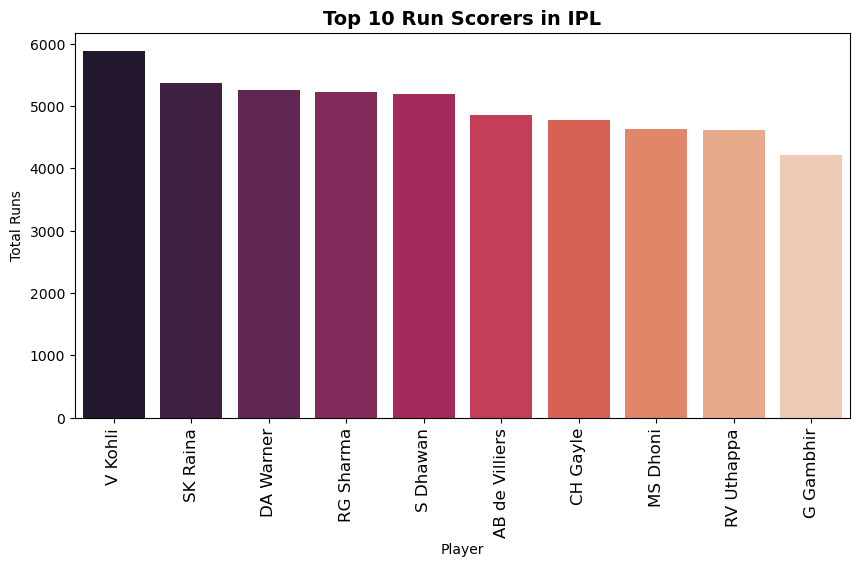

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(x=y["batsman"], y=y["batsman_runs"], palette="rocket")
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("Player")
plt.ylabel("Total Runs")
plt.title("Top 10 Run Scorers in IPL", fontsize=14, fontweight="bold")
plt.show()


Text(0.5, 1.0, 'heighest Man-OF-The-Match award winners')

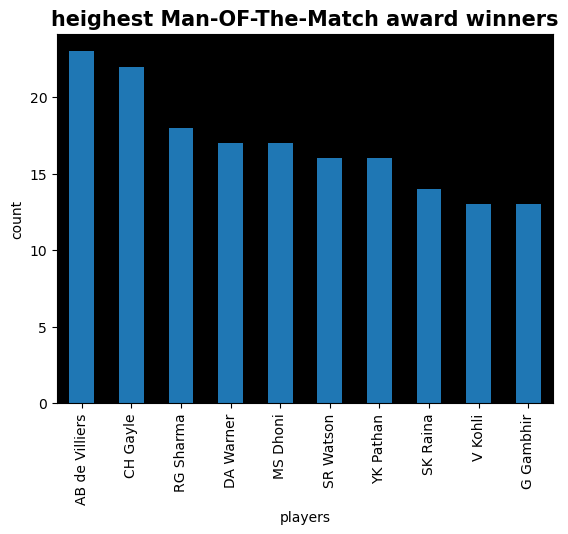

In [57]:
ax=plt.axes()
ax.set(facecolor="black")
match_data.player_of_match.value_counts()[:10].plot(kind="bar")
plt.xlabel("players")
plt.ylabel("count")
plt.title("heighest Man-OF-The-Match award winners",fontsize=15,fontweight="bold")
#plt.axes():-creates a new axes object. This is where we will add our plot. It is equivalent to creating a canvas where we can draw the graph.
#value_counts():-counts how many times each player appears in the player_of_match column. This tells us how many times each player won the "Player of the Match" award.
#[:10] selects the top 10 players with the most "Player of the Match" awards (i.e., the 10 most frequent players).